## Dados para o training set

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tables_io
import qp
import sys 
from matplotlib import gridspec


### 1. Criando o data frame:

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df

,Unnamed: 0.1,Unnamed: 0,id_truth_type,match_objectId,objectId,detect_isPrimary,ra,dec,redshift,u_Mag,g_Mag,r_Mag,i_Mag,z_Mag,y_Mag
0,0,0,11566004557_1,1248684569339659127,1248684569339659127,True,49.839335,-44.517501,1.197790,27.087561,27.235955,27.416572,27.560443,27.217457,27.243271
1,1,1,11565016922_1,1248684569339652913,1248684569339652913,True,49.896594,-44.611334,1.018660,23.498725,23.561816,23.512837,23.202372,22.775913,22.708900
2,2,2,11564243406_1,1248684569339659330,1248684569339659330,True,49.838412,-44.514881,0.879862,27.336868,27.032729,26.472315,25.543578,25.273803,25.233835
3,3,3,11575580605_1,1248684569339638110,1248684569339638110,True,49.942568,-44.475189,2.078320,27.778685,27.197700,27.170926,27.166146,27.062837,27.003332
4,4,4,11568976258_1,1248684569339634400,1248684569339634400,True,49.973965,-44.617948,1.653980,26.127086,26.213888,26.422726,26.401176,26.429173,26.237733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441617,17764,17764,2312561331_1,2187342044018508335,2187342044018508335,True,71.041774,-26.950273,0.271055,26.155931,24.852144,23.894162,23.593999,23.433788,23.339428
441618,17765,17765,2326751096_1,2187342044018510818,2187342044018510818,True,71.174616,-26.864777,2.202400,24.200782,23.872385,23.805646,23.868890,23.853008,23.727188
441619,17766,17766,2314675871_1,2187342044018531609,2187342044018531609,True,71.102133,-26.904560,0.979188,29.310426,28.353855,27.130589,26.170389,25.465289,25.189861
441620,17767,17767,2325686524_1,2187342044018517166,2187342044018517166,True,71.010916,-26.942638,2.079850,27.240779,27.220714,27.379286,27.548660,27.670643,27.776223


#### Renomeando as colunas:

In [4]:
columns_map = {
    "redshift": "redshift",
    "ra": "ra",
    "dec": "dec",
    "u_Mag": "mag_u_lsst",
    "g_Mag": "mag_g_lsst",
    "r_Mag": "mag_r_lsst",
    "i_Mag": "mag_i_lsst",
    "y_Mag": "mag_y_lsst",
    "z_Mag": "mag_z_lsst"
}
df = df.rename(columns=columns_map)

In [5]:
df

,Unnamed: 0.1,Unnamed: 0,id_truth_type,match_objectId,objectId,detect_isPrimary,ra,dec,redshift,mag_u_lsst,mag_g_lsst,mag_r_lsst,mag_i_lsst,mag_z_lsst,mag_y_lsst
0,0,0,11566004557_1,1248684569339659127,1248684569339659127,True,49.839335,-44.517501,1.197790,27.087561,27.235955,27.416572,27.560443,27.217457,27.243271
1,1,1,11565016922_1,1248684569339652913,1248684569339652913,True,49.896594,-44.611334,1.018660,23.498725,23.561816,23.512837,23.202372,22.775913,22.708900
2,2,2,11564243406_1,1248684569339659330,1248684569339659330,True,49.838412,-44.514881,0.879862,27.336868,27.032729,26.472315,25.543578,25.273803,25.233835
3,3,3,11575580605_1,1248684569339638110,1248684569339638110,True,49.942568,-44.475189,2.078320,27.778685,27.197700,27.170926,27.166146,27.062837,27.003332
4,4,4,11568976258_1,1248684569339634400,1248684569339634400,True,49.973965,-44.617948,1.653980,26.127086,26.213888,26.422726,26.401176,26.429173,26.237733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441617,17764,17764,2312561331_1,2187342044018508335,2187342044018508335,True,71.041774,-26.950273,0.271055,26.155931,24.852144,23.894162,23.593999,23.433788,23.339428
441618,17765,17765,2326751096_1,2187342044018510818,2187342044018510818,True,71.174616,-26.864777,2.202400,24.200782,23.872385,23.805646,23.868890,23.853008,23.727188
441619,17766,17766,2314675871_1,2187342044018531609,2187342044018531609,True,71.102133,-26.904560,0.979188,29.310426,28.353855,27.130589,26.170389,25.465289,25.189861
441620,17767,17767,2325686524_1,2187342044018517166,2187342044018517166,True,71.010916,-26.942638,2.079850,27.240779,27.220714,27.379286,27.548660,27.670643,27.776223


### 2. Calculando o erros (notebook da Melissa):

Use the 10-year depths ($5\sigma$ limiting magnitudes) for the LSST wide-fast-deep survey from <a href="https://ui.adsabs.harvard.edu/abs/2019ApJ...873..111I/abstract">Ivezić et al. (2019)</a> to calculate magnitude uncertaintites. 

The photometric error, $\sigma_{\rm rand}$, is given in Section 3.2.1 of Ivezić et al. (2019):

$$ \sigma_{\rm rand}^2 = (0.04 − \gamma)x + \gamma x^2 $$

where $ x = 10^{0.4(m - m_5)}$, $m_5$ is the $5\sigma$ limiting magnitude, $m$ is the magnitude of a galaxy, and for the LSST optical filters the values for $\gamma$ (which sets the impact of, e.g., sky brightness) are 0.037, 0.038, 0.039, 0.039, 0.04, and 0.04 for filters _ugrizy_, respectively.

Apply an uncertainty floor of 0.005. 

Any galaxy with a simulated uncertainty >0.2 mag is of too poor photometric quality to contribute to the training set, so the value of `mag_f_noMW_err` is reset to `NaN` and this galaxy is not used.

In [6]:
m5 = [26.09, 27.38, 27.53, 26.83, 26.06, 24.86]
gamma = [0.037, 0.038, 0.039, 0.039, 0.04, 0.04]
bands = ['u', 'g', 'r', 'i', 'z', 'y']

In [7]:
for f, filt in enumerate(bands):
    temp = np.power(10, 0.4*(df['mag_'+filt+'_lsst'] - m5[f]))
    df['mag_'+filt+'_lsst_err'] = np.sqrt( (0.04-gamma[f])*temp + (gamma[f]*temp**2) )
    del temp
    tx = np.where(df.loc[:, 'mag_'+filt+'_lsst_err'] < 0.005)[0]
    df.loc[tx, 'mag_'+filt+'_lsst_err'] = 0.005
    del tx
    
    tx = np.where(df.loc[:, 'mag_'+filt+'_lsst_err'] > 0.2)[0]
    df.loc[tx, 'mag_'+filt+'_lsst_err'] = float('NaN')
    del tx

To generate observed apparent magnitudes, a random value drawn from a normal distribution with a standard deviation equal to the photometric error for each galaxy is added to the true catalog magnitude.

At the same time, ensure that all galaxies with photometric errors of `NaN` also have observed magnitudes of `NaN`.

In [8]:
for f, filt in enumerate(bands):
    df['mag_'+filt+'_lsst_obs'] = df['mag_'+filt+'_lsst'] + \
                                       (np.random.normal(size=len(df)) * \
                                        df['mag_'+filt+'_lsst_err'])
    
    tx = np.where(np.isnan(df.loc[:, 'mag_'+filt+'_lsst_err']))[0]
    df.loc[tx, 'mag_'+filt+'_lsst'] = float('NaN')
    del tx

In [9]:
df

,Unnamed: 0.1,Unnamed: 0,id_truth_type,match_objectId,objectId,detect_isPrimary,ra,dec,redshift,mag_u_lsst,...,mag_r_lsst_err,mag_i_lsst_err,mag_z_lsst_err,mag_y_lsst_err,mag_u_lsst_obs,mag_g_lsst_obs,mag_r_lsst_obs,mag_i_lsst_obs,mag_z_lsst_obs,mag_y_lsst_obs
0,0,0,11566004557_1,1248684569339659127,1248684569339659127,True,49.839335,-44.517501,1.197790,NaN,...,0.180408,NaN,NaN,NaN,NaN,27.395890,27.471723,NaN,NaN,NaN
1,1,1,11565016922_1,1248684569339652913,1248684569339652913,True,49.896594,-44.611334,1.018660,23.498725,...,0.006969,0.009179,0.009714,0.027580,23.498418,23.566344,23.518939,23.194730,22.781014,22.736745
2,2,2,11564243406_1,1248684569339659330,1248684569339659330,True,49.838412,-44.514881,0.879862,NaN,...,0.077042,0.062871,0.096951,NaN,NaN,26.612343,26.403581,25.683037,25.273073,NaN
3,3,3,11575580605_1,1248684569339638110,1248684569339638110,True,49.942568,-44.475189,2.078320,NaN,...,0.144384,NaN,NaN,NaN,NaN,27.397895,27.181424,NaN,NaN,NaN
4,4,4,11568976258_1,1248684569339634400,1248684569339634400,True,49.973965,-44.617948,1.653980,NaN,...,0.073712,0.135554,NaN,NaN,NaN,26.248252,26.460318,26.485626,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441617,17764,17764,2312561331_1,2187342044018508335,2187342044018508335,True,71.041774,-26.950273,0.271055,NaN,...,0.009125,0.012300,0.017805,0.049295,NaN,24.818100,23.901140,23.613746,23.456759,23.282219
441618,17765,17765,2326751096_1,2187342044018510818,2187342044018510818,True,71.174616,-26.864777,2.202400,24.200782,...,0.008560,0.015238,0.026196,0.070454,24.151021,23.861829,23.810439,23.903081,23.850541,23.708632
441619,17766,17766,2314675871_1,2187342044018531609,2187342044018531609,True,71.102133,-26.904560,0.979188,NaN,...,0.139209,0.110072,0.115650,NaN,NaN,NaN,27.047908,26.023913,25.422291,NaN
441620,17767,17767,2325686524_1,2187342044018517166,2187342044018517166,True,71.010916,-26.942638,2.079850,NaN,...,0.174402,NaN,NaN,NaN,NaN,27.289181,27.300281,NaN,NaN,NaN


#### Renomenando as colunas de erros:

In [10]:
columns_map = {
    "redshift": "redshift",
    "ra": "ra",
    "dec": "dec",
    "mag_u_lsst_err": "mag_err_u_lsst",
    "mag_g_lsst_err": "mag_err_g_lsst",
    "mag_r_lsst_err": "mag_err_r_lsst",
    "mag_i_lsst_err": "mag_err_i_lsst",
    "mag_y_lsst_err": "mag_err_y_lsst",
    "mag_z_lsst_err": "mag_err_z_lsst",
    
}
df = df.rename(columns=columns_map)

In [11]:
df

,Unnamed: 0.1,Unnamed: 0,id_truth_type,match_objectId,objectId,detect_isPrimary,ra,dec,redshift,mag_u_lsst,...,mag_err_r_lsst,mag_err_i_lsst,mag_err_z_lsst,mag_err_y_lsst,mag_u_lsst_obs,mag_g_lsst_obs,mag_r_lsst_obs,mag_i_lsst_obs,mag_z_lsst_obs,mag_y_lsst_obs
0,0,0,11566004557_1,1248684569339659127,1248684569339659127,True,49.839335,-44.517501,1.197790,NaN,...,0.180408,NaN,NaN,NaN,NaN,27.395890,27.471723,NaN,NaN,NaN
1,1,1,11565016922_1,1248684569339652913,1248684569339652913,True,49.896594,-44.611334,1.018660,23.498725,...,0.006969,0.009179,0.009714,0.027580,23.498418,23.566344,23.518939,23.194730,22.781014,22.736745
2,2,2,11564243406_1,1248684569339659330,1248684569339659330,True,49.838412,-44.514881,0.879862,NaN,...,0.077042,0.062871,0.096951,NaN,NaN,26.612343,26.403581,25.683037,25.273073,NaN
3,3,3,11575580605_1,1248684569339638110,1248684569339638110,True,49.942568,-44.475189,2.078320,NaN,...,0.144384,NaN,NaN,NaN,NaN,27.397895,27.181424,NaN,NaN,NaN
4,4,4,11568976258_1,1248684569339634400,1248684569339634400,True,49.973965,-44.617948,1.653980,NaN,...,0.073712,0.135554,NaN,NaN,NaN,26.248252,26.460318,26.485626,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441617,17764,17764,2312561331_1,2187342044018508335,2187342044018508335,True,71.041774,-26.950273,0.271055,NaN,...,0.009125,0.012300,0.017805,0.049295,NaN,24.818100,23.901140,23.613746,23.456759,23.282219
441618,17765,17765,2326751096_1,2187342044018510818,2187342044018510818,True,71.174616,-26.864777,2.202400,24.200782,...,0.008560,0.015238,0.026196,0.070454,24.151021,23.861829,23.810439,23.903081,23.850541,23.708632
441619,17766,17766,2314675871_1,2187342044018531609,2187342044018531609,True,71.102133,-26.904560,0.979188,NaN,...,0.139209,0.110072,0.115650,NaN,NaN,NaN,27.047908,26.023913,25.422291,NaN
441620,17767,17767,2325686524_1,2187342044018517166,2187342044018517166,True,71.010916,-26.942638,2.079850,NaN,...,0.174402,NaN,NaN,NaN,NaN,27.289181,27.300281,NaN,NaN,NaN


## 3. Cortes de magnitudes

#### 3.1 Corte na magnitude 25 na banda i:

In [12]:
df = df[df["mag_i_lsst"] < 25]

In [13]:
df

,Unnamed: 0.1,Unnamed: 0,id_truth_type,match_objectId,objectId,detect_isPrimary,ra,dec,redshift,mag_u_lsst,...,mag_err_r_lsst,mag_err_i_lsst,mag_err_z_lsst,mag_err_y_lsst,mag_u_lsst_obs,mag_g_lsst_obs,mag_r_lsst_obs,mag_i_lsst_obs,mag_z_lsst_obs,mag_y_lsst_obs
1,1,1,11565016922_1,1248684569339652913,1248684569339652913,True,49.896594,-44.611334,1.018660,23.498725,...,0.006969,0.009179,0.009714,0.027580,23.498418,23.566344,23.518939,23.194730,22.781014,22.736745
8,8,8,11563840646_1,1248684569339630649,1248684569339630649,True,49.933036,-44.513005,0.795145,NaN,...,0.042076,0.031855,0.048712,0.136513,NaN,26.613639,25.720103,24.755009,24.515070,24.572767
9,9,9,11563252924_1,1248684569339654011,1248684569339654011,True,49.965052,-44.594628,0.647496,25.873583,...,0.021633,0.025991,0.043524,0.119341,25.856109,25.594090,25.035706,24.563997,24.512432,24.370001
11,11,11,11563134828_1,1248684569339654873,1248684569339654873,True,49.958337,-44.581273,0.617298,25.175977,...,0.009554,0.010102,0.013337,0.033708,25.113530,24.764323,23.964492,23.356048,23.122132,22.994893
16,16,16,11565301187_1,1248684569339656182,1248684569339656182,True,49.866674,-44.562272,1.063110,24.439455,...,0.012244,0.015450,0.015610,0.041509,24.458755,24.604838,24.271733,23.896983,23.259713,23.150892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441614,17761,17761,2312940748_1,2187342044018533765,2187342044018533765,True,71.137936,-26.870865,0.530211,21.316828,...,0.005000,0.005000,0.005000,0.005000,21.320956,20.817107,19.926779,19.441229,19.258692,18.962941
441616,17763,17763,2312562294_1,2187342044018530996,2187342044018530996,True,71.046634,-26.916810,0.271550,23.729099,...,0.005000,0.005000,0.005000,0.005000,23.699133,21.909310,20.511478,19.955951,19.666544,19.422790
441617,17764,17764,2312561331_1,2187342044018508335,2187342044018508335,True,71.041774,-26.950273,0.271055,NaN,...,0.009125,0.012300,0.017805,0.049295,NaN,24.818100,23.901140,23.613746,23.456759,23.282219
441618,17765,17765,2326751096_1,2187342044018510818,2187342044018510818,True,71.174616,-26.864777,2.202400,24.200782,...,0.008560,0.015238,0.026196,0.070454,24.151021,23.861829,23.810439,23.903081,23.850541,23.708632


#### 3.2 Corte na magnitude 16 na banda i:

In [14]:
df = df[df["mag_i_lsst"] > 16]

In [15]:
df

,Unnamed: 0.1,Unnamed: 0,id_truth_type,match_objectId,objectId,detect_isPrimary,ra,dec,redshift,mag_u_lsst,...,mag_err_r_lsst,mag_err_i_lsst,mag_err_z_lsst,mag_err_y_lsst,mag_u_lsst_obs,mag_g_lsst_obs,mag_r_lsst_obs,mag_i_lsst_obs,mag_z_lsst_obs,mag_y_lsst_obs
1,1,1,11565016922_1,1248684569339652913,1248684569339652913,True,49.896594,-44.611334,1.018660,23.498725,...,0.006969,0.009179,0.009714,0.027580,23.498418,23.566344,23.518939,23.194730,22.781014,22.736745
8,8,8,11563840646_1,1248684569339630649,1248684569339630649,True,49.933036,-44.513005,0.795145,NaN,...,0.042076,0.031855,0.048712,0.136513,NaN,26.613639,25.720103,24.755009,24.515070,24.572767
9,9,9,11563252924_1,1248684569339654011,1248684569339654011,True,49.965052,-44.594628,0.647496,25.873583,...,0.021633,0.025991,0.043524,0.119341,25.856109,25.594090,25.035706,24.563997,24.512432,24.370001
11,11,11,11563134828_1,1248684569339654873,1248684569339654873,True,49.958337,-44.581273,0.617298,25.175977,...,0.009554,0.010102,0.013337,0.033708,25.113530,24.764323,23.964492,23.356048,23.122132,22.994893
16,16,16,11565301187_1,1248684569339656182,1248684569339656182,True,49.866674,-44.562272,1.063110,24.439455,...,0.012244,0.015450,0.015610,0.041509,24.458755,24.604838,24.271733,23.896983,23.259713,23.150892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441614,17761,17761,2312940748_1,2187342044018533765,2187342044018533765,True,71.137936,-26.870865,0.530211,21.316828,...,0.005000,0.005000,0.005000,0.005000,21.320956,20.817107,19.926779,19.441229,19.258692,18.962941
441616,17763,17763,2312562294_1,2187342044018530996,2187342044018530996,True,71.046634,-26.916810,0.271550,23.729099,...,0.005000,0.005000,0.005000,0.005000,23.699133,21.909310,20.511478,19.955951,19.666544,19.422790
441617,17764,17764,2312561331_1,2187342044018508335,2187342044018508335,True,71.041774,-26.950273,0.271055,NaN,...,0.009125,0.012300,0.017805,0.049295,NaN,24.818100,23.901140,23.613746,23.456759,23.282219
441618,17765,17765,2326751096_1,2187342044018510818,2187342044018510818,True,71.174616,-26.864777,2.202400,24.200782,...,0.008560,0.015238,0.026196,0.070454,24.151021,23.861829,23.810439,23.903081,23.850541,23.708632


#### 3.3 Corte na magnitude 99 em todas as bandas:

In [16]:
for i in bands:
    df = df[df["mag_"+i+"_lsst"] < 99]

In [17]:
df

,Unnamed: 0.1,Unnamed: 0,id_truth_type,match_objectId,objectId,detect_isPrimary,ra,dec,redshift,mag_u_lsst,...,mag_err_r_lsst,mag_err_i_lsst,mag_err_z_lsst,mag_err_y_lsst,mag_u_lsst_obs,mag_g_lsst_obs,mag_r_lsst_obs,mag_i_lsst_obs,mag_z_lsst_obs,mag_y_lsst_obs
1,1,1,11565016922_1,1248684569339652913,1248684569339652913,True,49.896594,-44.611334,1.018660,23.498725,...,0.006969,0.009179,0.009714,0.027580,23.498418,23.566344,23.518939,23.194730,22.781014,22.736745
9,9,9,11563252924_1,1248684569339654011,1248684569339654011,True,49.965052,-44.594628,0.647496,25.873583,...,0.021633,0.025991,0.043524,0.119341,25.856109,25.594090,25.035706,24.563997,24.512432,24.370001
11,11,11,11563134828_1,1248684569339654873,1248684569339654873,True,49.958337,-44.581273,0.617298,25.175977,...,0.009554,0.010102,0.013337,0.033708,25.113530,24.764323,23.964492,23.356048,23.122132,22.994893
16,16,16,11565301187_1,1248684569339656182,1248684569339656182,True,49.866674,-44.562272,1.063110,24.439455,...,0.012244,0.015450,0.015610,0.041509,24.458755,24.604838,24.271733,23.896983,23.259713,23.150892
29,29,29,11567674553_1,1248675773246636581,1248675773246636581,True,50.125454,-44.527788,1.473160,25.186439,...,0.018972,0.024451,0.035858,0.058732,25.348445,24.922047,24.847559,24.432480,24.229628,23.485451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441610,17757,17757,2313159294_1,2187280471367393261,2187280471367393261,True,71.156867,-26.967276,0.612524,25.853557,...,0.007873,0.007558,0.009187,0.023830,25.826302,24.955722,23.680057,22.921937,22.716360,22.606130
441614,17761,17761,2312940748_1,2187342044018533765,2187342044018533765,True,71.137936,-26.870865,0.530211,21.316828,...,0.005000,0.005000,0.005000,0.005000,21.320956,20.817107,19.926779,19.441229,19.258692,18.962941
441616,17763,17763,2312562294_1,2187342044018530996,2187342044018530996,True,71.046634,-26.916810,0.271550,23.729099,...,0.005000,0.005000,0.005000,0.005000,23.699133,21.909310,20.511478,19.955951,19.666544,19.422790
441618,17765,17765,2326751096_1,2187342044018510818,2187342044018510818,True,71.174616,-26.864777,2.202400,24.200782,...,0.008560,0.015238,0.026196,0.070454,24.151021,23.861829,23.810439,23.903081,23.850541,23.708632


## 4. Funções

In [18]:
def plot_errors(catalog):
    bands = ['u', 'g', 'r', 'i', 'z', 'y']
    j=1
    plt.figure(figsize=[9,13])
    for i, band in enumerate(bands): 
        plt.subplot(3,2,j)
        mag = np.array(catalog[f'mag_{band}_lsst'])
        err = np.array(catalog[f'mag_err_{band}_lsst'])
        sn = 1/(10**(0.4*err)-1)
        plt.hexbin(mag,sn , None, mincnt=1, cmap='inferno', gridsize=[200,100], bins='log')
        cbar = plt.colorbar()
        plt.ylabel("S/R ", fontsize=13)
        plt.xlabel("mag "+band, fontsize=13)
        plt.ylim(0,100)
        plt.xlim(20,30)
        plt.axhline(10, color= 'red')
        plt.grid(True)
        j+=1
        plt.tight_layout()
        plt.savefig('erros.png', format='png')

In [19]:
def mag_histogram(catalog, title='DP0.2'):
    bands = ['u','g', 'r', 'i', 'z','y']
    colors = ['blue', 'green', 'orange','red','purple','gray']
    plt.figure(figsize=(9,13))
    bins = np.linspace(9, 37, 57)
    j=1
    for i, (band, color) in enumerate(zip(bands,colors)):
        plt.subplot(3,2,j)
        plt.hist(catalog[f'mag_{band}_lsst'], histtype='stepfilled', bins=bins, label=f'{band} band', alpha = 0.5,
                 edgecolor = "black", color = color)
        #plt.xlim(16,27)
        plt.yscale('log')
        plt.xlabel('mag',fontsize=13)
        plt.ylabel('counts',fontsize=13)
        plt.legend(loc=2)
        plt.grid(True)
        j+=1
    plt.suptitle(title)
    plt.savefig('histograma.png', format='png')
    plt.show()

In [20]:
def mag_color(catalog):
    bands = ['u', 'g', 'r', 'i', 'z','y']
    mag_diff = {}
    plt.figure(figsize=(9,13))
    i=1
    for band,_band in zip(bands, bands[1::]):
        plt.subplot(3,2,i)
        i+=1
        mag_diff_v = catalog[f'mag_{band}_lsst']-catalog[f'mag_{_band}_lsst']
        mag_v = catalog[f'mag_{band}_lsst']
        plt.hexbin(mag_v, mag_diff_v, None, mincnt=1, cmap='Reds', gridsize=[400,200], bins='log')
        plt.xlabel("mag "+band,fontsize=13)
        plt.ylabel(f"{band}-{_band}",fontsize=13)
        #plt.legend()
        plt.xlim(16,32)
        plt.ylim(-2,5)
        plt.grid(True)
        plt.tight_layout()
        plt.savefig('magColor.png', format='png')
    plt.show()

In [21]:
def color_color(catalog):
    bands = ['u', 'g', 'r', 'i', 'z','y']
    i=1
    plt.figure(figsize=(12,12))
    for index in range(len(bands)-2):
        plt.subplot(3,2,i)
        i+=1
        color = catalog[f'mag_{bands[index+1]}_lsst']
        next_color = catalog[f'mag_{bands[index+2]}_lsst']
        past_color = catalog[f'mag_{bands[index]}_lsst']
        plt.hexbin(past_color-color,color-next_color, None, mincnt=1, cmap='turbo', gridsize=[400,200], bins='log')
        plt.xlabel(f'{bands[index+1]}-{bands[index+2]}',fontsize=13)
        plt.ylabel(f'{bands[index]}-{bands[index+1]}',fontsize=13)
        cbar = plt.colorbar()
        plt.xlim(-1,3)
        plt.ylim(-1,3)
        plt.savefig('colorColor.png', format='png')
    plt.show()

In [22]:
def color_color_red(catalog,xlim=[-1,3],ylim=[-1,3]):
    bands = ['u', 'g', 'r', 'i', 'z','y']
    i=1
    plt.figure(figsize=(12,12))
    for index in range(len(bands)-2):
        plt.subplot(3,2,i)
        i+=1
        color = catalog[f'mag_{bands[index+1]}_lsst']
        next_color = catalog[f'mag_{bands[index+2]}_lsst']
        past_color = catalog[f'mag_{bands[index]}_lsst']
        plt.hexbin(past_color-color,color-next_color, C=catalog['redshift'], mincnt=1, cmap='turbo', gridsize=[400,200])
        plt.xlabel(f'{bands[index+1]}-{bands[index+2]}',fontsize=13)
        plt.ylabel(f'{bands[index]}-{bands[index+1]}',fontsize=13)
        cbar = plt.colorbar(label='redshift')
        plt.xlim(xlim[0],xlim[1])
        plt.ylim(ylim[0],ylim[1])
        plt.savefig('colorColorRed.png', format='png')
    plt.show()

### 4.1 Erros

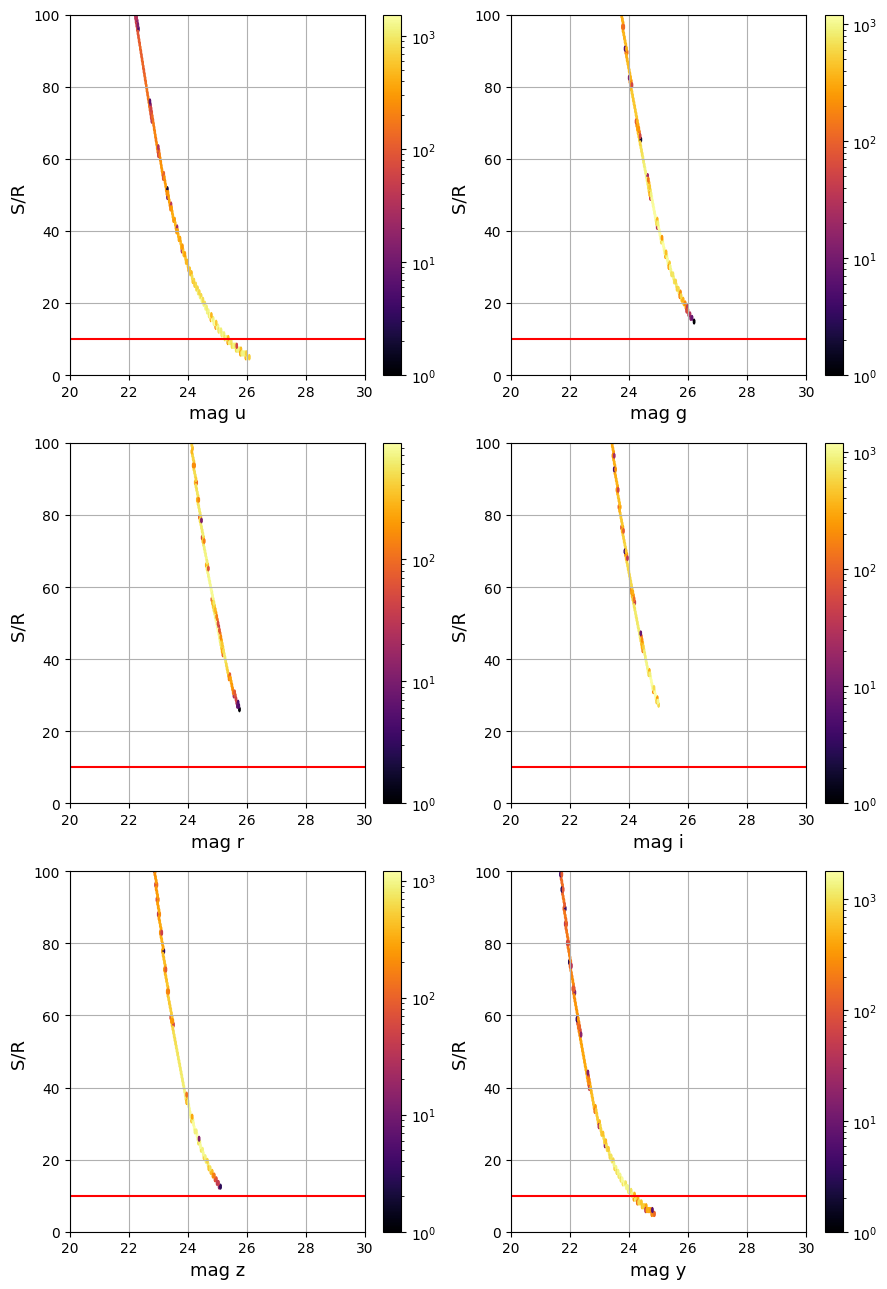

In [23]:
plot_errors(df)

### 4.2 Histogramas

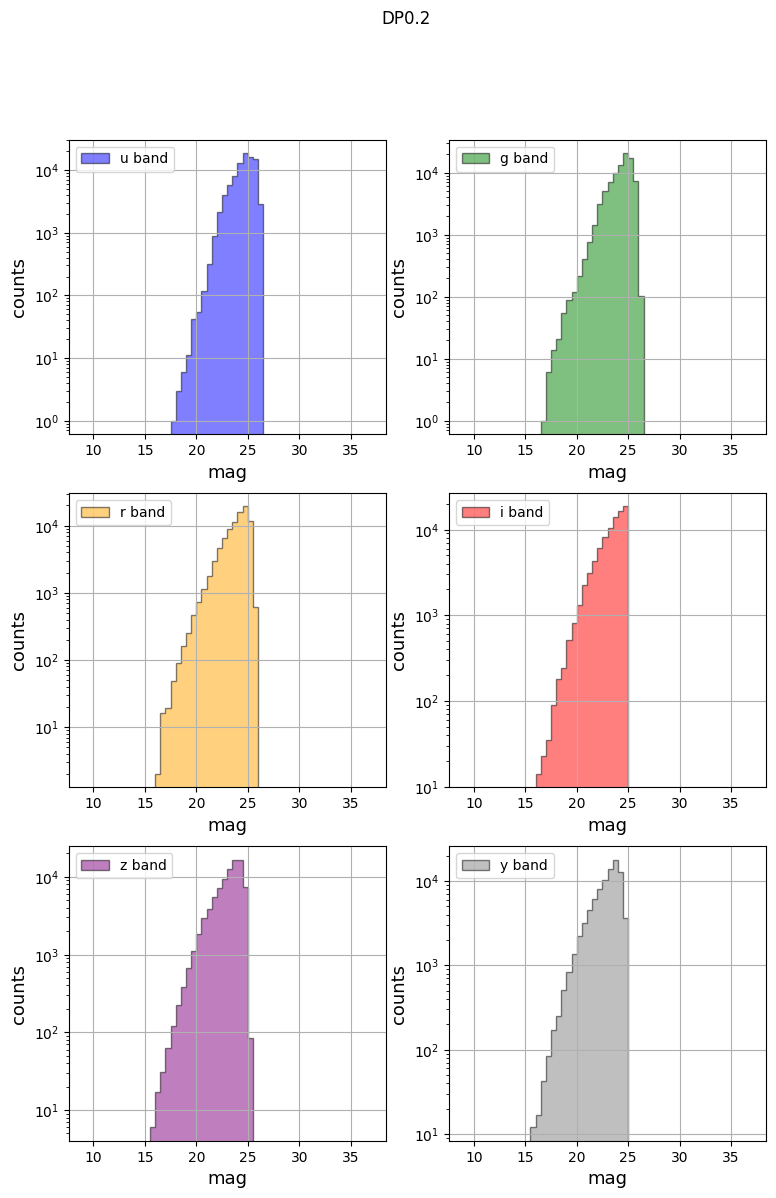

In [24]:
mag_histogram(df)

### 4.3 Cor x magnitude

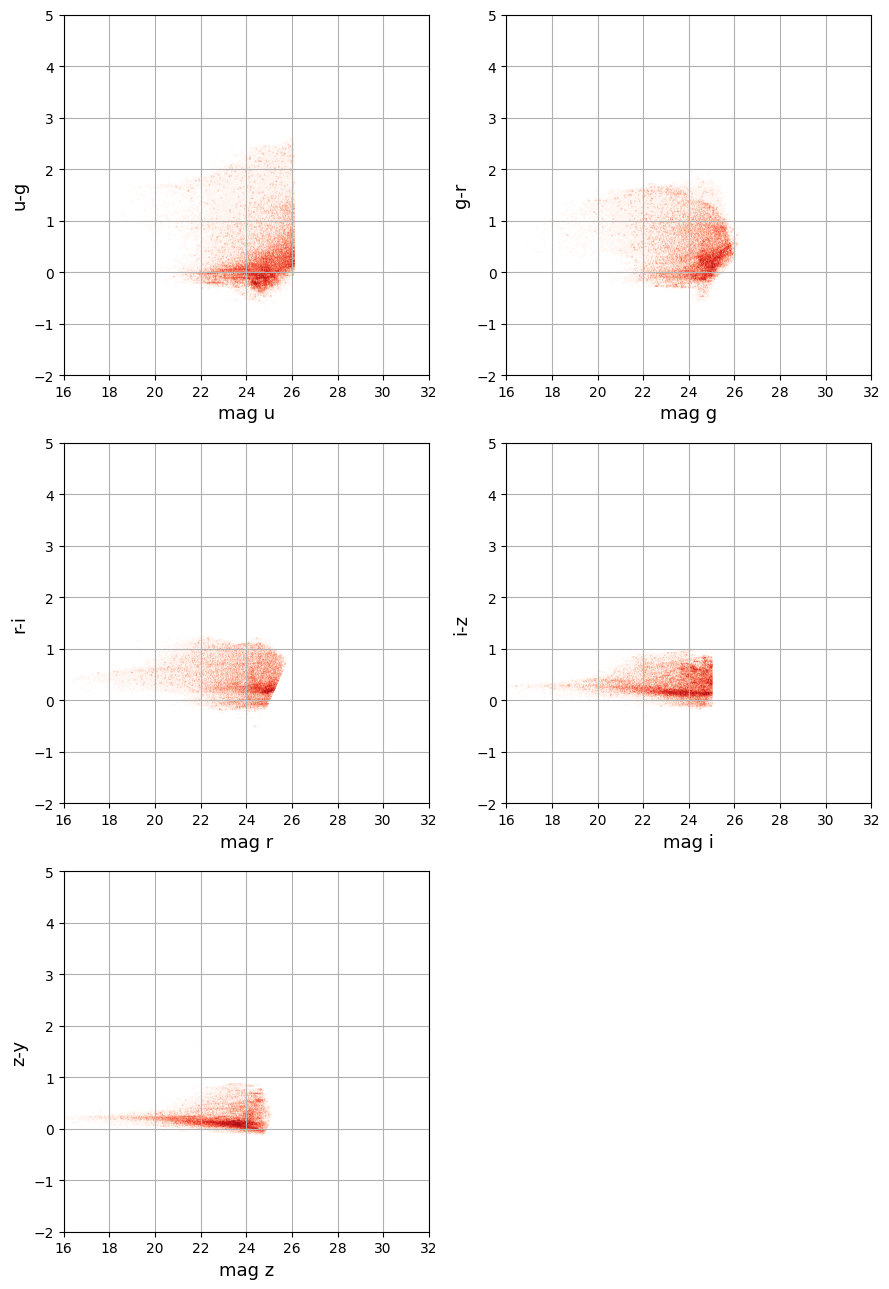

In [25]:
mag_color(df)

### 4.4 Cor x cor

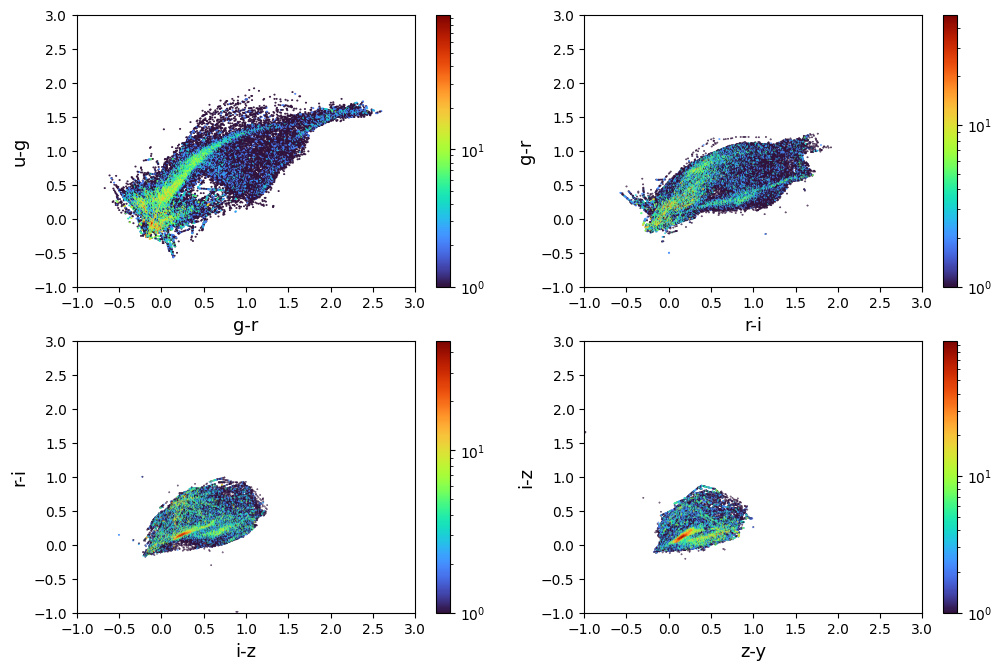

In [26]:
color_color(df)

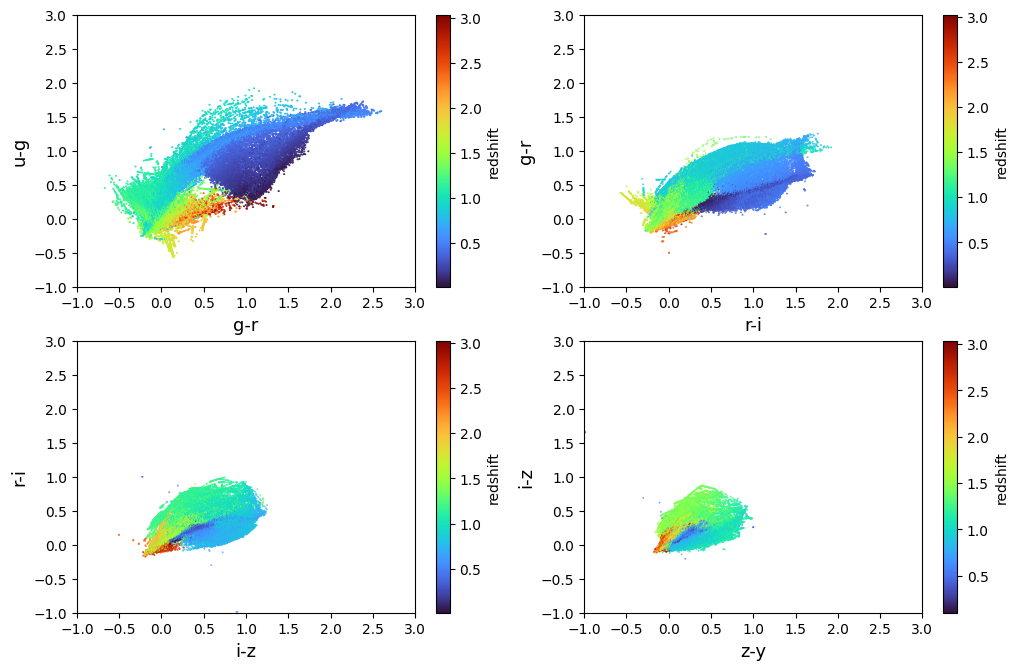

In [27]:
color_color_red(df)

### 4.5 Área do céu

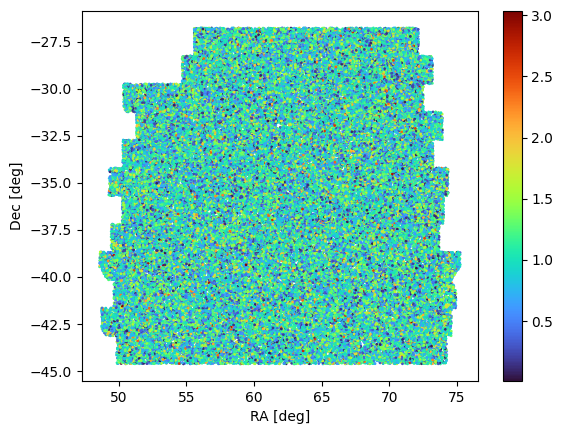

In [28]:
plt.scatter(df['ra'],df['dec'], c=df['redshift'],cmap='turbo',s=1)
plt.xlabel('RA [deg]')
plt.ylabel('Dec [deg]')
plt.colorbar()
plt.savefig('areaCeu.png', format='png')